In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import os
from datetime import datetime
import math
import itertools 

import scipy.stats as st
import statsmodels

from sklearn.preprocessing import PowerTransformer
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error as MAE
from sklearn import linear_model

import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import imp

import json
sys.path.insert(1, '../')
import lib.pe_down_loading_data_frame as loader
imp.reload(loader)
import lib.pe_utils as utils
imp.reload(utils)
import lib.pe_model as pe_model
imp.reload(pe_model)
import lib.pe_config as conf
imp.reload(conf)
import lib.pe_df_analyzer as analyzer
imp.reload(analyzer)
import lib.pe_varmaker as va_m
imp.reload(va_m)
import lib.pe_df_writer as writer
imp.reload(writer)
import lib.pe_metrics as metrics
imp.reload(metrics)
import lib.pe_preprocessing as prepro
imp.reload(prepro)
import lib.la_prepro as la_prepro
imp.reload(la_prepro)
import lib.la_utils as la_utils
imp.reload(la_utils)
import lib.la_model as model
imp.reload(model)
load_model_data = utils.load_model_data
load_var_data  = utils.load_var_data

In [4]:
dots = 5
two_week = 60 * 24 * 7 * 2
get_var = True
step = '1m'
dc_period = {'au2-acs1': ['14/01/2020 00:01', '18/05/2020 23:45'],
             'us6-acs2': ['14/01/2020 00:01', '18/05/2020 23:45'],
             'eu3-acs1': ['14/01/2020 00:01', '18/05/2020 23:45'],
             'us3':      ['14/01/2020 00:01', '18/05/2020 23:45'],
            }

# В этой тетрадке начинаем разбор модели ARMA

In [5]:
dc = 'us3'
inst_n = 3
data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
data = data[24 * 7 * 60 * 2:]
predictor_imp = model.ModelLA(imp_features=6, q=3, k_train=6, k_test=7)
predictor_imp.fit(data)
out = predictor_imp.predict(data)

Тут посмотрим как меняются коэффициенты при повторнм обучении

In [6]:
predictor_imp.train_f_hist

,abgw_req_latency_ms_count__Append+OpenFile,abgw_iop_latency_ms_count__open(pcs),abgw_iop_latency_ms_sum__open(pcs),abgw_fds,abgw_files,abgw_read_bufs,abgw_req_latency_ms_count__Append+OpenFile__1,target__1,abgw_iop_latency_ms_count__open(pcs)__1,abgw_iop_latency_ms_sum__open(pcs)__1,...,target__2,abgw_iop_latency_ms_count__open(pcs)__2,abgw_iop_latency_ms_sum__open(pcs)__2,abgw_fds__2,abgw_files__2,abgw_read_bufs__2,ones,err_1,err_2,err_3
1,0.194076,-0.048412,0.054562,-0.003941,0.020252,-0.000765,-0.074915,0.349985,-0.024524,0.015341,...,0.319553,-0.023775,0.019925,0.002462,-0.023341,0.000163,0.003890,0.100853,0.068604,0.082326
2,0.199622,-0.046890,0.056986,-0.006610,0.020191,0.000341,-0.072090,0.351412,-0.028254,0.014874,...,0.321103,-0.026875,0.019586,0.006523,-0.023387,-0.001374,0.003554,0.101782,0.070654,0.081202
3,0.195924,-0.044030,0.057170,-0.005313,0.019570,0.002305,-0.068177,0.340986,-0.028140,0.014335,...,0.311472,-0.027951,0.017503,0.005995,-0.023475,0.002518,0.002202,0.098635,0.069100,0.078848
4,0.199418,-0.049517,0.053744,-0.002918,0.020738,-0.002249,-0.071056,0.351595,-0.024741,0.015218,...,0.321428,-0.024500,0.019191,0.003923,-0.022965,-0.001069,0.003535,0.108979,0.075015,0.088543
5,0.200643,-0.047611,0.056992,-0.006470,0.020508,-0.000013,-0.073129,0.354449,-0.027843,0.015033,...,0.323913,-0.026457,0.019889,0.006583,-0.023519,-0.001407,0.003586,0.099345,0.067454,0.078527
6,0.199802,-0.048144,0.056380,-0.006541,0.020586,-0.000411,-0.073772,0.354046,-0.028087,0.014925,...,0.323570,-0.026549,0.019973,0.007017,-0.023325,-0.001410,0.003755,0.101852,0.070236,0.081320


А тут на ошибку, в зависимости от отерации при оценке

In [7]:
predictor_imp.test_err_hist

,MAE
1,0.001629
2,0.001637
3,0.001633
4,0.001634
5,0.001634
6,0.001634
7,0.001634


# Сходимость при оценке и обучении
Посмотрим, как выбрать числ итераций для оценки и обучения модели.
Для этого построим графики как зависят коэффициенты от числа процедур.

In [35]:
dc = 'us3'
inst_n = 3
data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
data = data[24 * 7 * 60 * 2:]
s=1
e=5
layout1 = go.Layout(
        title=go.layout.Title(text=f'Test err through k_train, DC={dc}, inst_n={inst_n}'),
        xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='k_test')),
        yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='MAE on test'))
    )
fig1 = go.Figure(layout=layout1)
for k_train in np.linspace(s, e, num=(e-s+1), dtype=int):

    predictor_imp = model.ModelLA(imp_features=6, q=3, k_train=k_train, k_test=15)
    predictor_imp.fit(data)
    _ = predictor_imp.predict(data)

    layout = go.Layout(
        title=go.layout.Title(text=f'Coefficent depands on numbr of iteration, k_train={k_train}, DC={dc}, inst_n={inst_n}'),
        xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='k_train')),
        yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='coeff'))
    )
    fig = go.Figure(layout=layout)
    for c in predictor_imp.train_f_hist.columns:
        fig.add_trace(go.Scatter(y=predictor_imp.train_f_hist[c], x=predictor_imp.train_f_hist.index,
                                 name=c))

    fig.show()

    layout = go.Layout(
        title=go.layout.Title(text=f'MAE on test, k_train={k_train}, DC={dc}, inst_n={inst_n}'),
        xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='k_test')),
        yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='MAE on test'))
    )
    fig = go.Figure(layout=layout)
    fig.add_trace(go.Scatter(y=predictor_imp.test_err_hist['MAE'], x=predictor_imp.test_err_hist.index))
    fig1.add_trace(go.Scatter(y=predictor_imp.test_err_hist['MAE'], x=predictor_imp.test_err_hist.index,
                              name=f'k_train={k_train}'))

    fig.show()
fig1.show()

# Вывод про число итераций
Похоже нужно ещё один график построить

In [10]:
'''
s=1
e=12
k_trains = np.linspace(s, e, num=(e-s+1), dtype=int)
_d = pd.DataFrame()
train_size = 60 * 24 * 7 * 2
test_size = 60 * 24 * 7 * 2
for dc in dc_period:
    print(f'dc={dc}')
    for _i, inst_n in enumerate(sorted(conf.get_inst_range_for_dc(dc))):
        print(f'\tinst = {_i+1} / {len(conf.get_inst_range_for_dc(dc))}', end = '\r')
        data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
        train_data = data[:train_size]
        test_data = data[train_size: train_size + test_size]

        for k_train in k_trains:

            predictor_imp = model.ModelLA(imp_features=6, q=3, k_train=k_train, k_test=10)
            predictor_imp.fit(train_data)
            _ = predictor_imp.predict(test_data)
            _d[f'dc={dc}__inst={inst_n}__k_train={k_train}'] = predictor_imp.test_err_hist['MAE']

_d.to_csv('../datasets/Aleksander/ARMA_k_train.csv', index=False)
'''

dc=au2-acs1
dc=us6-acs2/ 19
dc=eu3-acs1/ 30
dc=us3= 31 / 31


In [34]:
d = pd.read_csv('../datasets/Aleksander/ARMA_k_train.csv')
for dc in dc_period:
    layout = go.Layout(
        title=go.layout.Title(text=f'MAE on test for number of train iteration, ARMA'),
        xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='N train itteration')),
        yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='MAE'))
    )
    fig = go.Figure(layout=layout)
    for _i, inst_n in enumerate(sorted(conf.get_inst_range_for_dc(dc))):
        cols = []
        y = []
        x = []
        for c in d.columns:
            if c.split('__')[0] == f'dc={dc}' and c.split('__')[1] == f'inst={inst_n}':
                y.append(d[c].loc[5])
                x.append(int(c.split('__')[2][8:]))                 
        fig.add_trace(go.Scatter(y=y,
                                 x=x,
                                 name=f'inst_n={inst_n}__dc={dc}'
                                )
                     )

    fig.show()

Впринципе можно тверждать, что $k_{train}=2$ отличный выбор. Качество сильно не улучшается, но время экономится значительно.

При $k_{test} = 4$ ошибка стабилизируется.

Так, а теперь перейдём к оценке $Q$

# Q

dc=au2-acs1


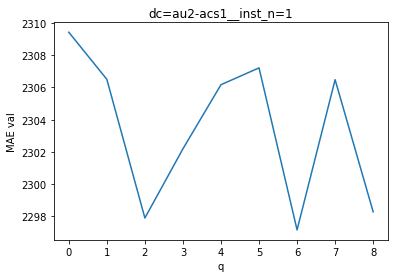

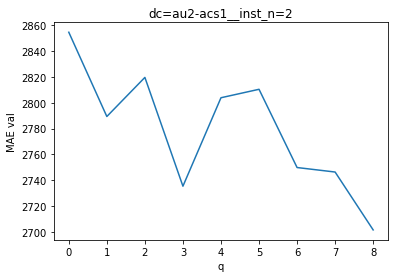

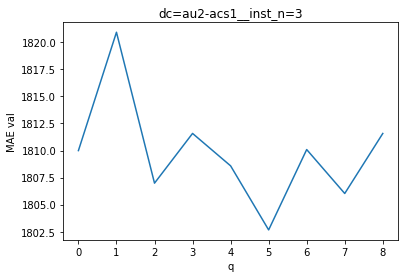

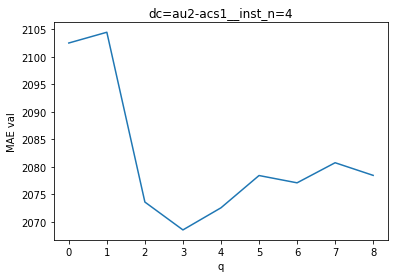

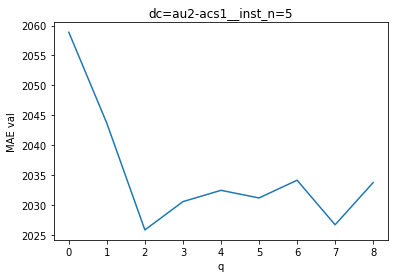

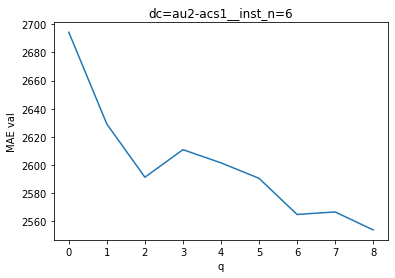

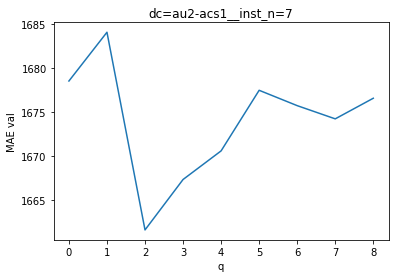

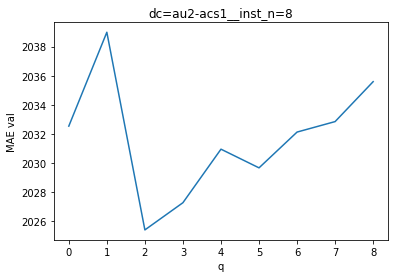

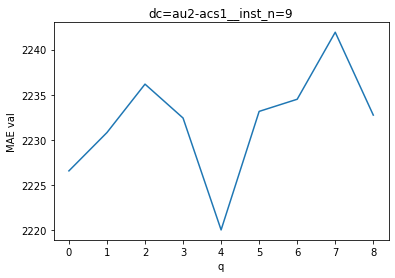

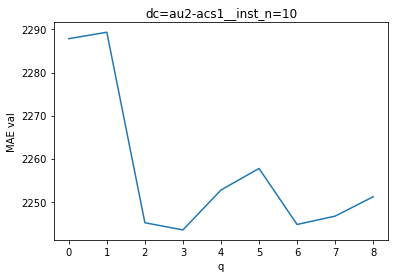

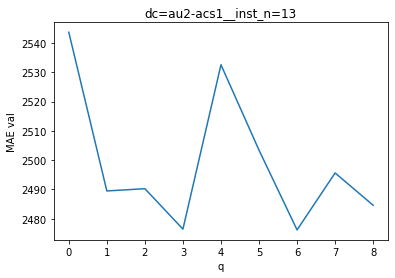

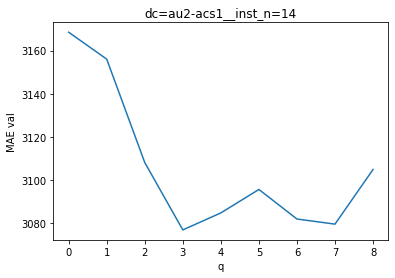

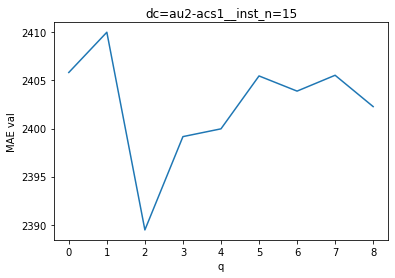

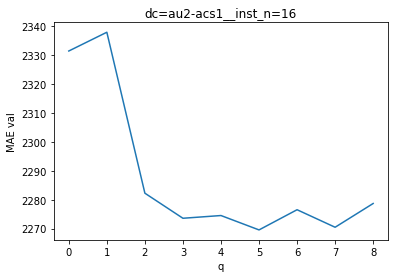

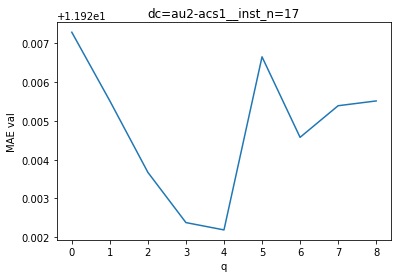

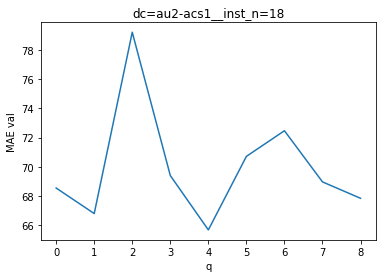

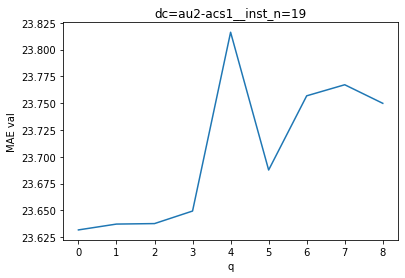

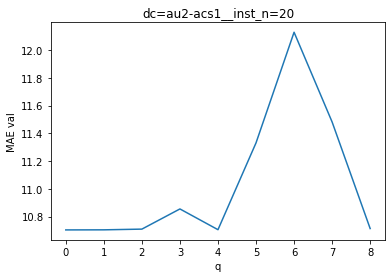

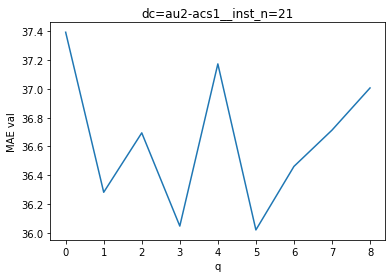

dc=us6-acs2


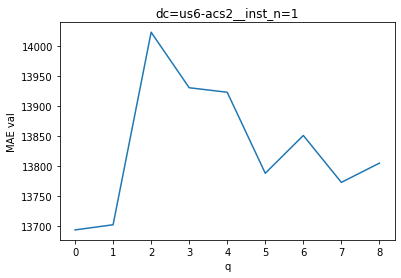

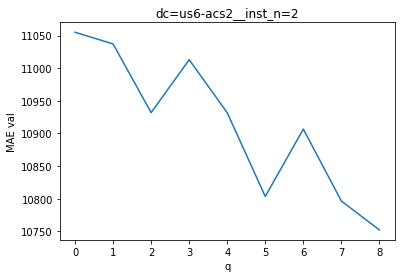

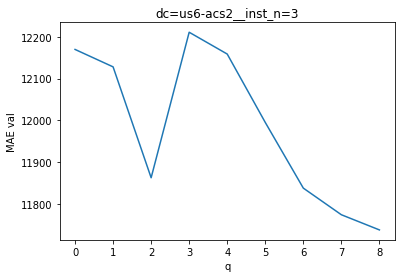

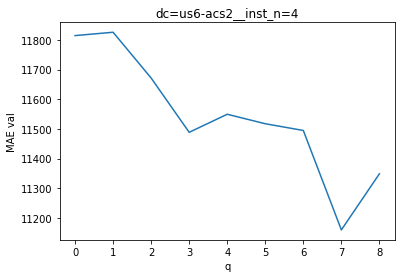

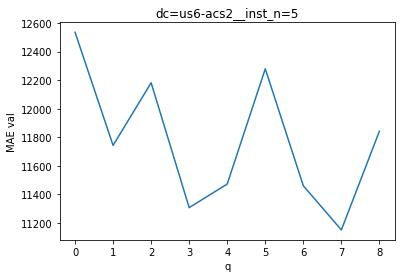

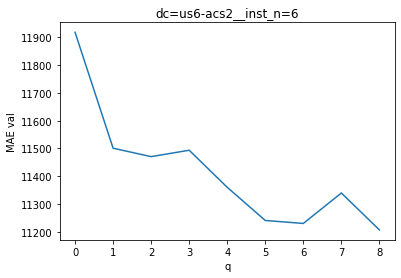

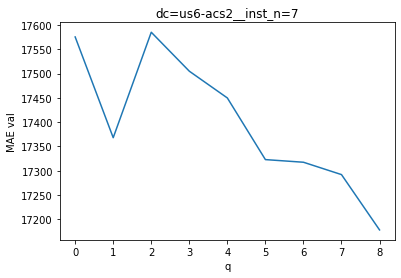

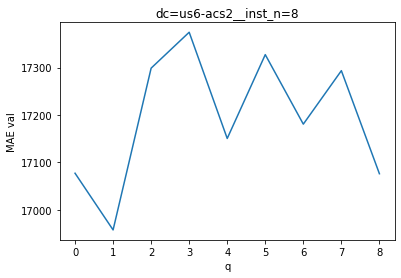

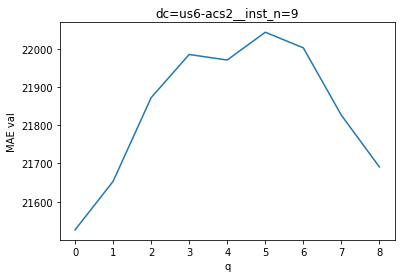

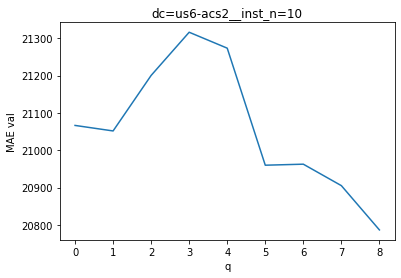

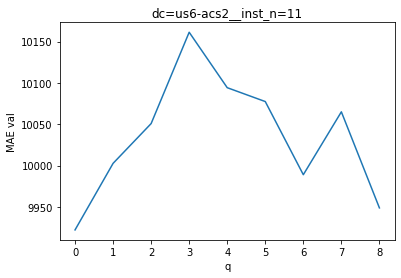

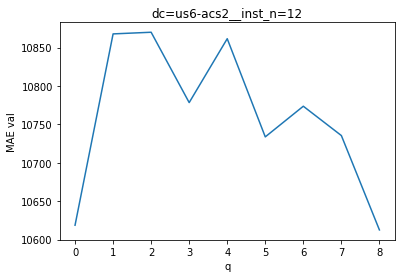

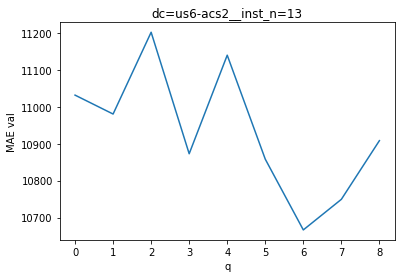

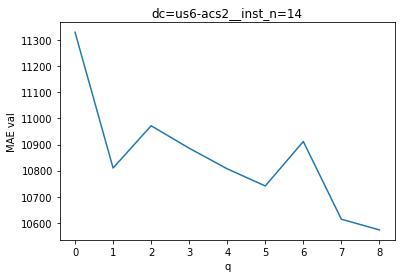

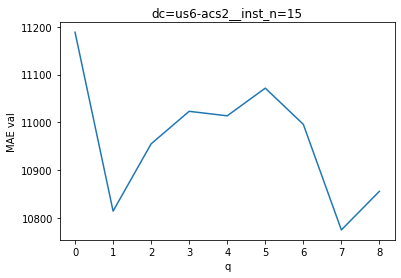

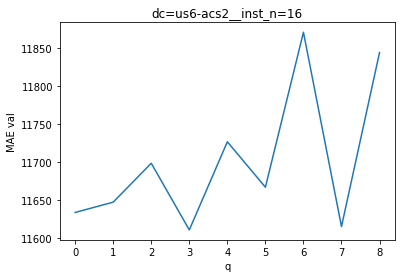

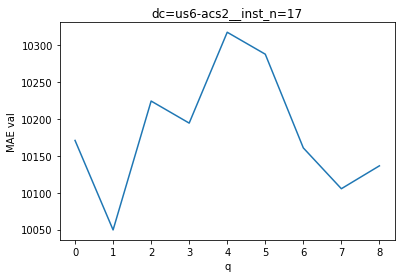

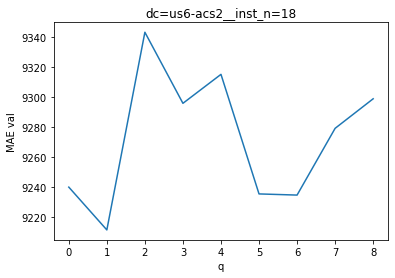

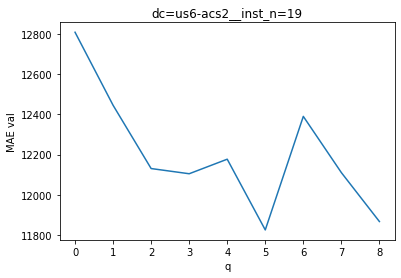

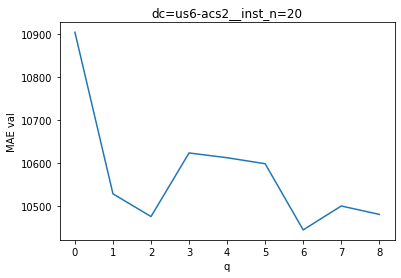

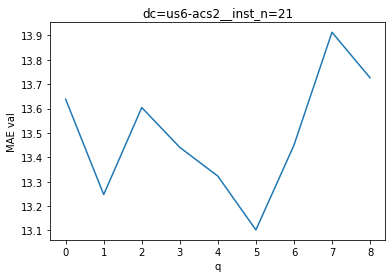

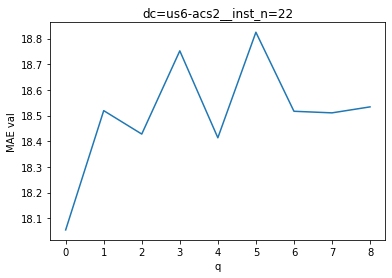

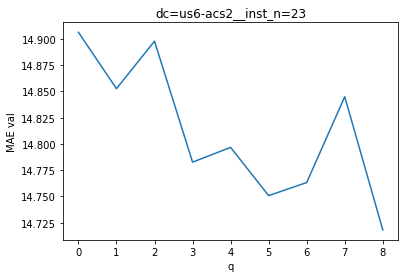

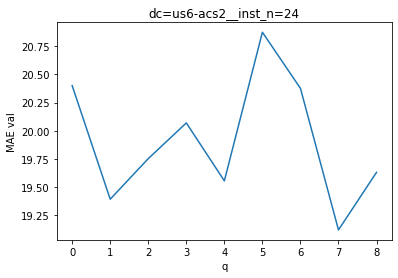

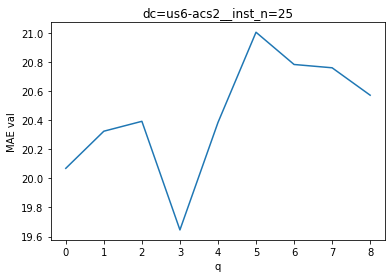

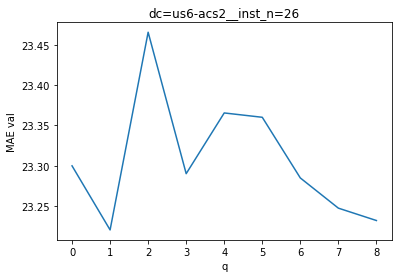

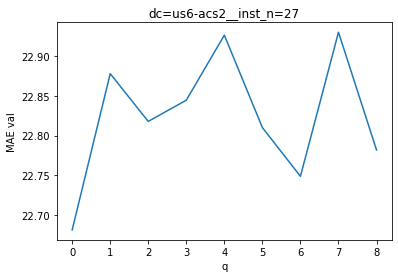

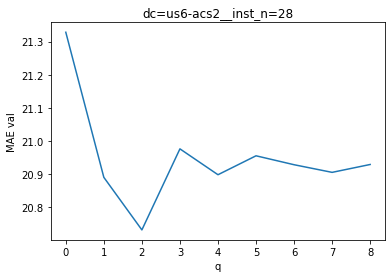

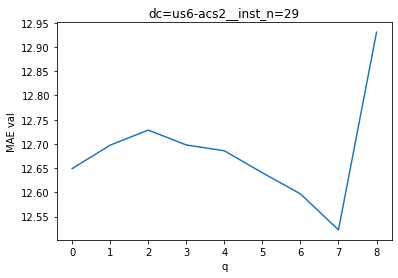

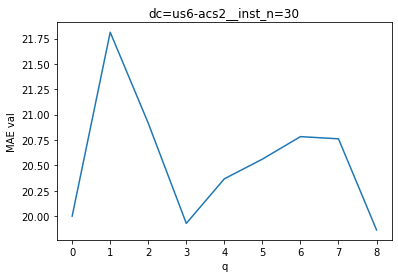

dc=eu3-acs1


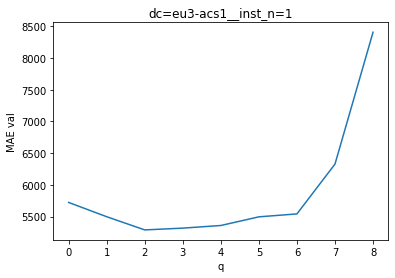

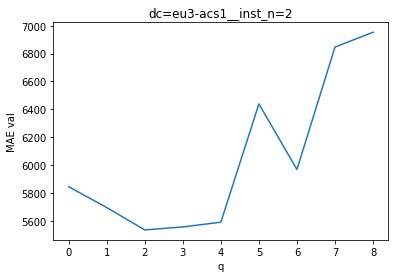

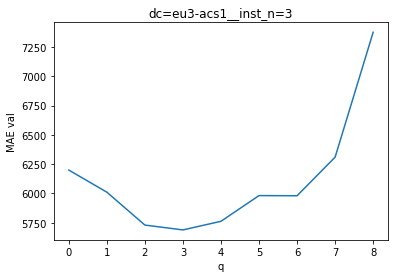

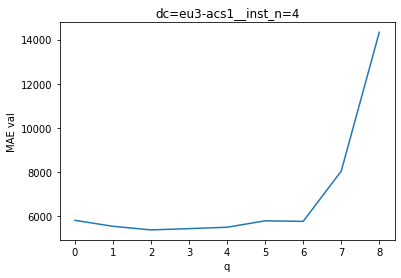

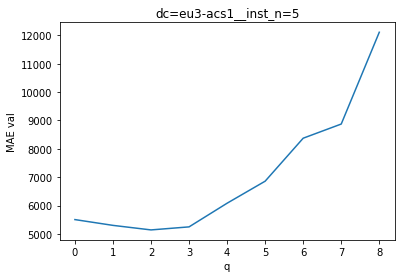

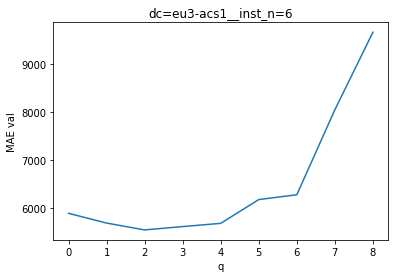

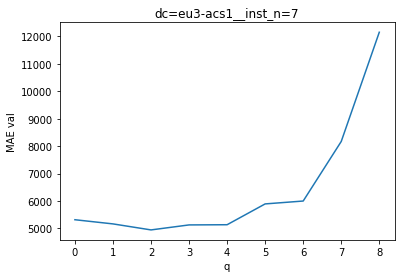

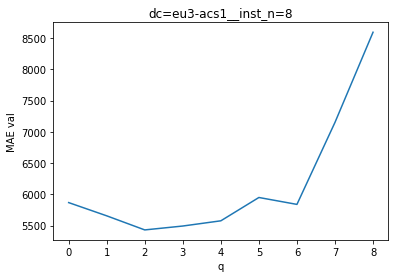

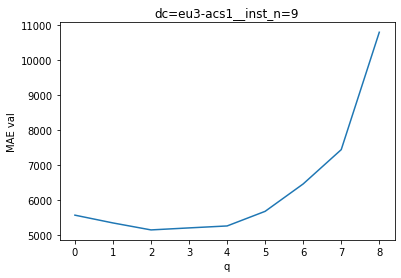

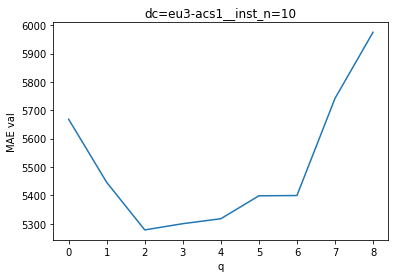

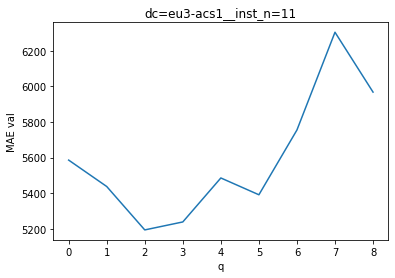

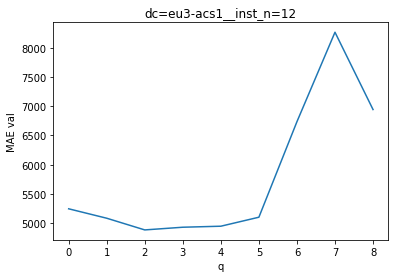

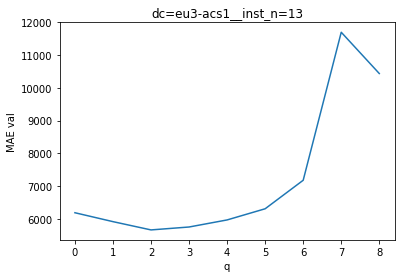

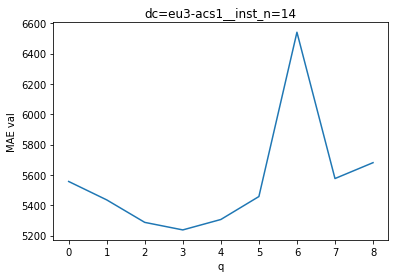

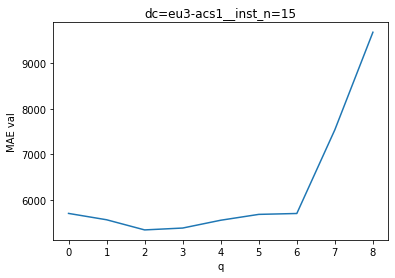

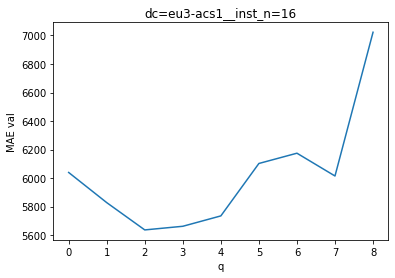

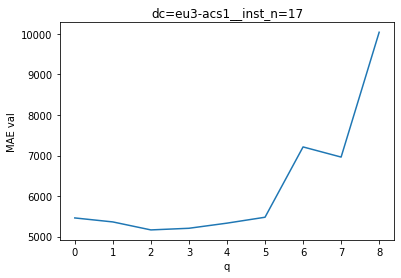

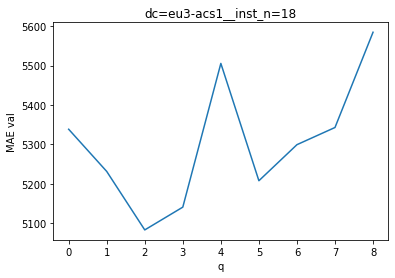

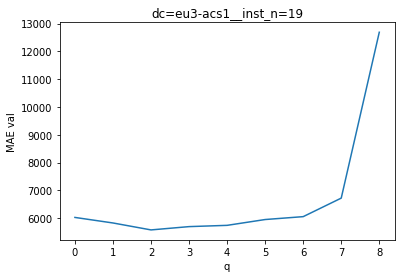

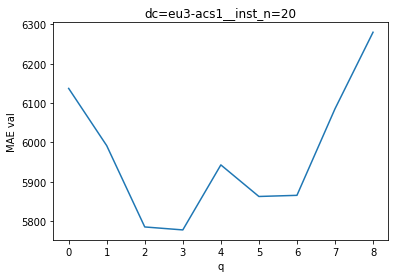

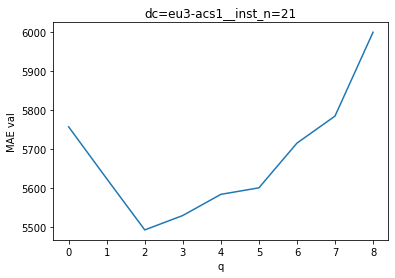

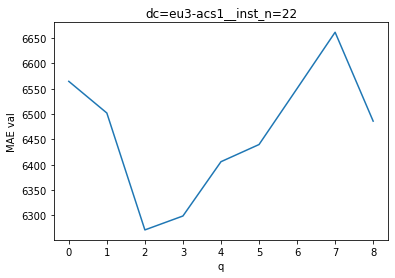

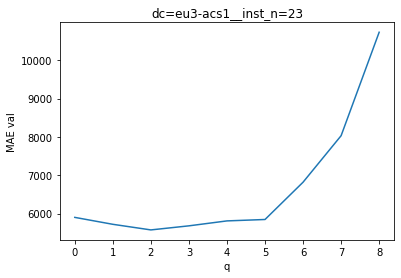

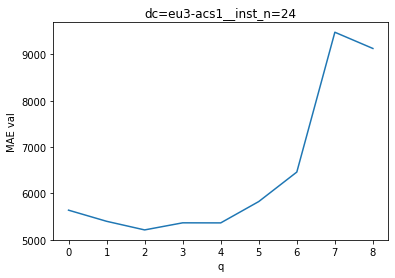

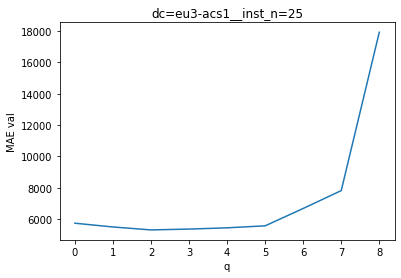

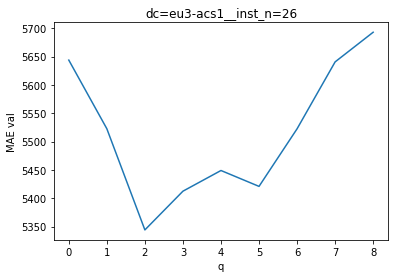

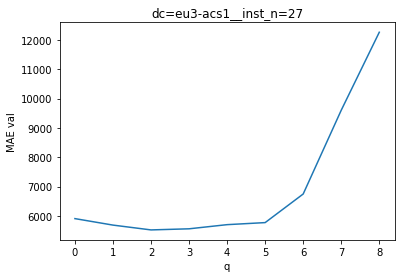

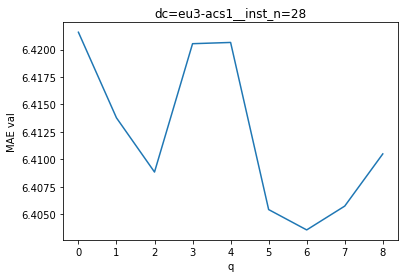

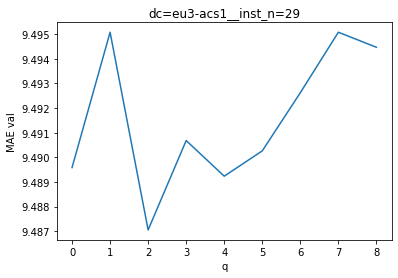

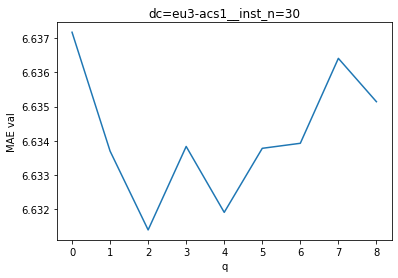

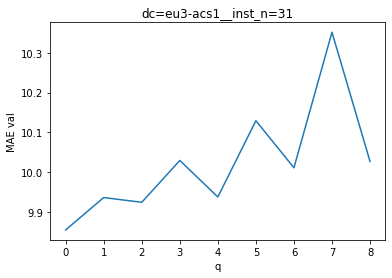

dc=us3


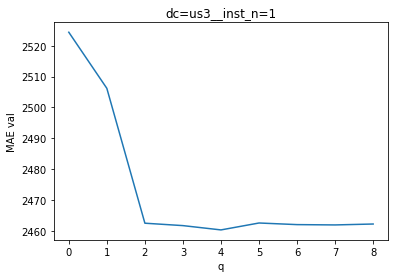

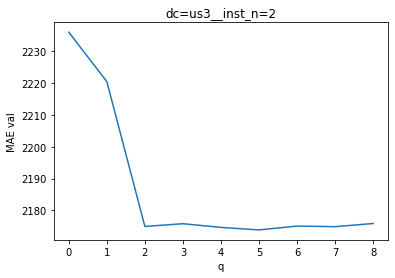

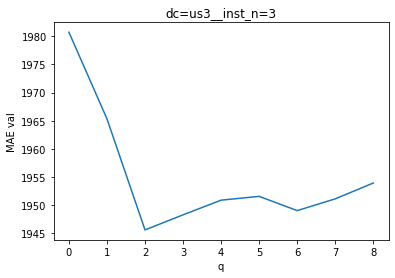

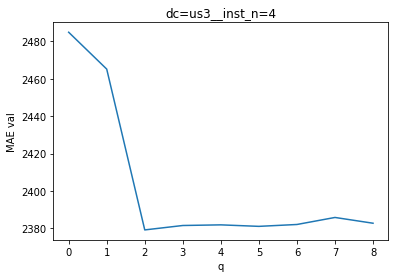

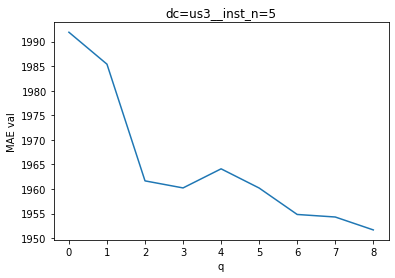

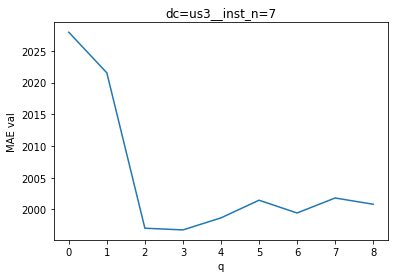

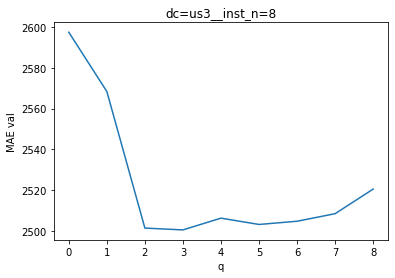

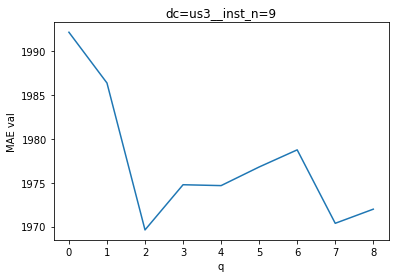

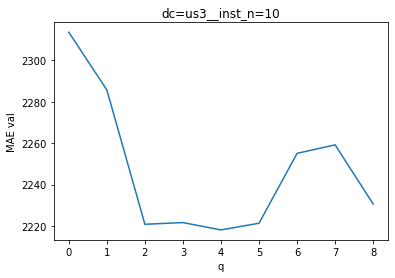

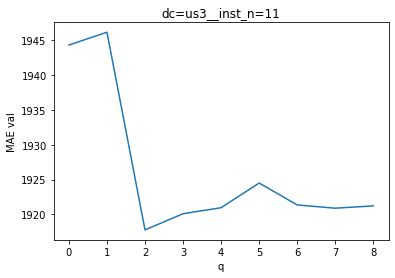

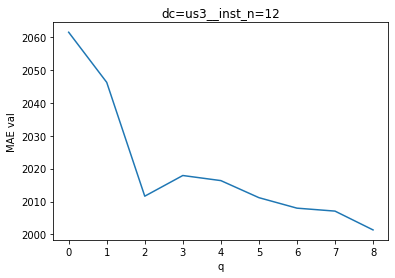

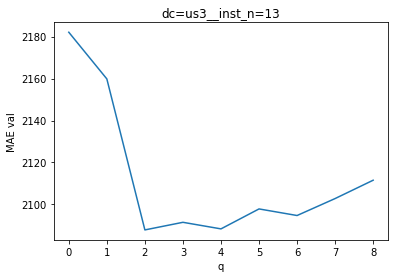

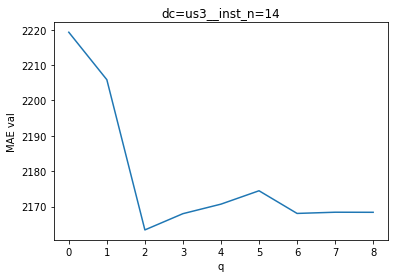

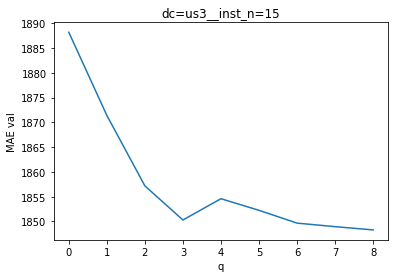

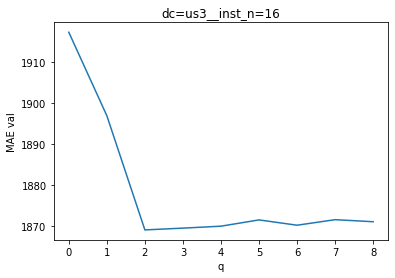

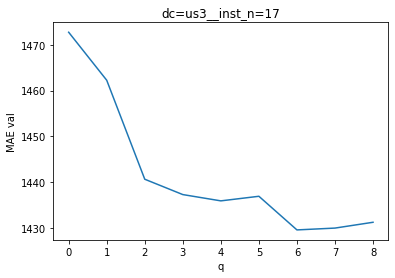

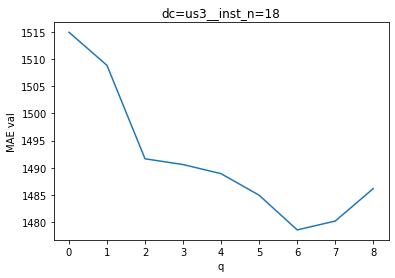

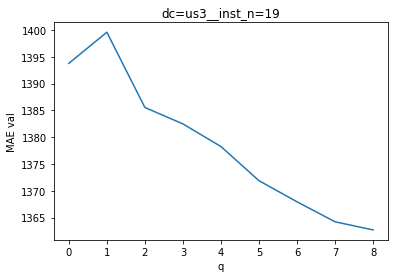

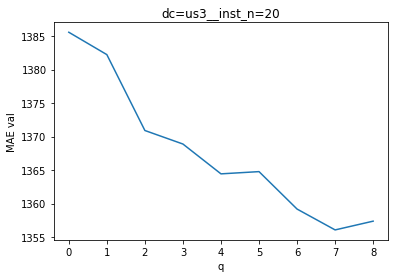

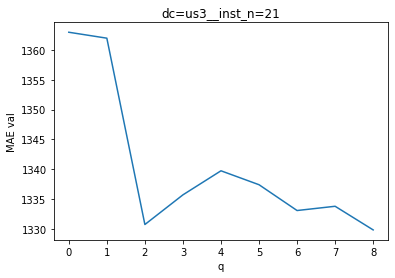

In [43]:
# '''
s = 0
e = 8
qs = np.linspace(s, e, num=(e - s + 1), dtype=int)

train_size = 60 * 24 * 7
test_size = 60 * 24 * 7 * 2
q_data = pd.DataFrame()
q_data['qs'] = qs
# dots_data = pd.read_csv('../datasets/Aleksander/dots_data.csv')
for dc in dc_period:
    print(f'dc={dc}')
    for _i, inst_n in enumerate(sorted(conf.get_inst_range_for_dc(dc))):

        if f'dc={dc}__inst_n={inst_n}' not in list(q_data.columns.values):
            print(f'\tinst = {_i+1} / {len(conf.get_inst_range_for_dc(dc))}', end = '\r')
            data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
            # data['date'] = data['time_stamp'].apply(lambda x: datetime.fromtimestamp(x))
            data = la_prepro.fill_misses(data)
            maes = []
            for q in qs:
                predictor = model.ModelLA(imp_features=6, q=q, k_train=2, k_test=4, dots=3)
                maes.append(metrics.get_validation_score(model=predictor, data=data, 
                                                         train_size=train_size, test_size=test_size,
                                                         n=5, error_func=MAE
                                                        )
                           )
            q_data[f'dc={dc}__inst_n={inst_n}'] = maes
            q_data.to_csv('../datasets/Aleksander/q_data.csv')
        
        plt.plot(q_data['qs'], q_data[f'dc={dc}__inst_n={inst_n}'])
        plt.title(f'dc={dc}__inst_n={inst_n}')
        plt.xlabel('q')
        plt.ylabel('MAE val')
        plt.show()
# '''

In [45]:
train_size = 60 * 24 * 3 
test_size = 60 * 24 * 7
q_data = pd.read_csv('../datasets/Aleksander/q_data.csv')
for dc in dc_period:
    layout = go.Layout(
        title=go.layout.Title(text=f'MAE on validation, divided by max depands on num on q'),
        xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='q')),
        yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='MAE on validation divided by max'))
    )
    fig = go.Figure(layout=layout)
    for _i, inst_n in enumerate(sorted(conf.get_inst_range_for_dc(dc))):
        _y = q_data[f'dc={dc}__inst_n={inst_n}'].values.reshape(-1)
        _y = _y / max(_y)
        fig.add_trace(go.Scatter(y=_y,
                                 x=q_data['qs'],
                                 name=f'inst_n={inst_n}__dc={dc}'
                                )
                     )
    fig.show()

Если где и есть значимое различие - $q=2$